# 自适应中值滤波

In [14]:
from skimage import io,color
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
img = io.imread("images/noise.jpg")
img = color.rgb2gray(img)
w, h = img.shape

filtered_img = img.copy()

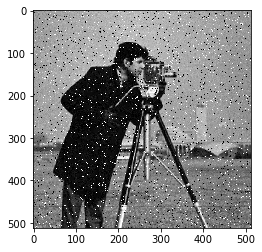

In [15]:
def AdaptiveMedianFilter(sMax):
	filterSize = 3
	borderSize = sMax // 2
	max_val = img[0,0]
	mid = (filterSize*filterSize)//2
	for i in range(w):
	    for j in range(h):
	        if(max_val < img[i,j]):
	            max_val = img[i,j]

	for i in range(borderSize,w-borderSize):
	    for j in range(borderSize,h-borderSize):
	        members = [max_val] * (sMax*sMax)
	        filterSize = 3
	        zxy = img[i,j]
	        result = zxy
	        while(filterSize<=sMax):
	            borderS = filterSize // 2
	            for k in range(filterSize):
	                for t in range(filterSize):
	                    members[k*filterSize+t] = img[i+k-borderS,j+t-borderS]
	            members.sort()
	            med  = (filterSize*filterSize)//2
	            zmin = members[0]
	            zmax = members[(filterSize-1)*(filterSize+1)]
	            zmed = members[med]
	            if(zmed<zmax and zmed > zmin):
	                if(zxy>zmin and zxy<zmax):
	                    result = zxy
	                else: 
	                    result = zmed
	                break
	            else:
	                filterSize += 2

	        filtered_img[i,j]=result

def renoiseInBorder(borderSize):
	for i in range(1,w):
	    for j in range(borderSize):
	        filtered_img[i,j] = filtered_img[i,borderSize]
	        filtered_img[i,h-j-1] = filtered_img[i,h-borderSize-1]
			
	for j in range(h):
	    for i in range(borderSize):
	        filtered_img[i,j] = filtered_img[borderSize,j]
	        filtered_img[w -i-1,j] = filtered_img[w-borderSize-1,j]

plt.imshow(img,plt.cm.gray)
plt.title('Original')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

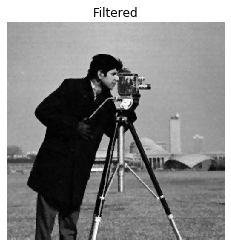

In [17]:
for i in range(7,1,-2):
	img = filtered_img.copy()
	#print(i)
	AdaptiveMedianFilter(i)
	if i==5:
		renoiseInBorder(2)
renoiseInBorder(1)
plt.imshow(filtered_img,plt.cm.gray)
plt.title('Filtered')
plt.axis('off')